In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from stop_words import get_stop_words
ROOT_DIR = os.path.abspath(os.curdir)

UNIFICACIÓN DE DATOS

In [2]:
def getFilesNames():
    DIR = os.path.join(ROOT_DIR, "descargas")
    os.chdir(DIR)
    ls = glob.glob("*.csv")
    return ls

In [3]:
file_name_list = getFilesNames()
dataframes = [ pd.read_csv(file,index_col=0) for file in file_name_list ]
dataset = pd.concat(dataframes)
dataset.head()

,coordenada,calificacion,comentario
titulo,,,
Restaurant SONIA,"-12.0773039,-77.1696105,11z",4,"Buena atención y el buen sabor se mantiene, lo..."
Restaurant SONIA,"-12.0773039,-77.1696105,11z",3,Nada del otro mundo.\nRegrese a Sonia después ...
Restaurant SONIA,"-12.0773039,-77.1696105,11z",4,"Si bien la comida es deliciosa, quizás los pre..."
Restaurant SONIA,"-12.0773039,-77.1696105,11z",5,He vuelto después de muchos años y debo decir ...
Restaurant SONIA,"-12.0773039,-77.1696105,11z",1,Vi los reviews y por eso fuimos probar a este ...


In [4]:
dataset.describe()

,coordenada,calificacion,comentario
count,10664,11350,11350
unique,17,5,10536
top,"-12.1440338,-77.0758734,13z",5,Muy bueno
freq,3113,6701,105


In [5]:
DIR = os.path.join(ROOT_DIR, "datajoin")
os.chdir(DIR)
dataset.to_csv('restaurantes_comentarios.csv', index=False)

Text(0.5, 1.0, 'Histograma')

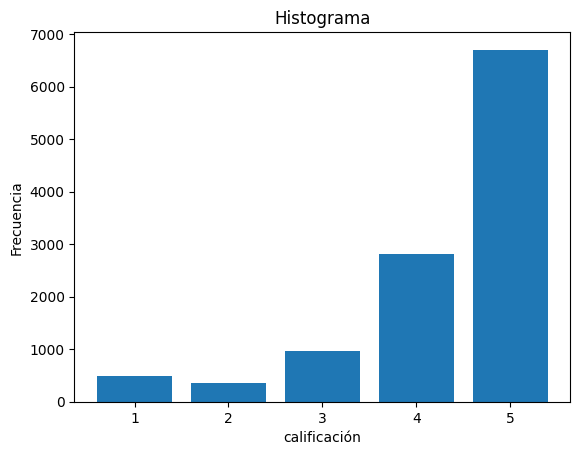

In [6]:
data_calification = dataset['calificacion']
unique_categories, category_counts = np.unique(data_calification, return_counts=True)
plt.bar(unique_categories, category_counts)
plt.xlabel('calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma')

Elaboración Corpus linguistico

In [7]:
data = pd.read_csv('restaurantes_comentarios.csv')
data.head()

,coordenada,calificacion,comentario
0,"-12.0773039,-77.1696105,11z",4,"Buena atención y el buen sabor se mantiene, lo..."
1,"-12.0773039,-77.1696105,11z",3,Nada del otro mundo.\nRegrese a Sonia después ...
2,"-12.0773039,-77.1696105,11z",4,"Si bien la comida es deliciosa, quizás los pre..."
3,"-12.0773039,-77.1696105,11z",5,He vuelto después de muchos años y debo decir ...
4,"-12.0773039,-77.1696105,11z",1,Vi los reviews y por eso fuimos probar a este ...


In [8]:
data = data[data['comentario'].notnull()]
data.shape

(11350, 3)

In [10]:
data['comentario'] = data['comentario'].str.lower()

In [72]:
import re
data['comentario_limpio'] = data['comentario'].apply(lambda texto: re.sub(r'[.,;:!()]', '', texto)) 
data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: texto.replace('\n', ' ')) 
data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: re.sub(r'[^A-Za-zñáéíóúÁÉÍÓÚ\s]', ' ', texto)) 

In [73]:
data['comentario_limpio'].head(40)

0     buena atención y el buen sabor se mantiene los...
1     nada del otro mundo regrese a sonia después de...
2     si bien la comida es deliciosa quizás los prec...
3     he vuelto después de muchos años y debo decir ...
4     vi los reviews y por eso fuimos probar a este ...
5     pedí una parihuela que no fue nada de mi agrad...
6         me gustó estos dos platos estuve delicioso   
7     este lugar es super caleta atienden a puerta c...
8     nos dejaron esperando en la puerta le pedimos ...
9     la seguridad del local es pésima te hacen espe...
10    excelente lugar para comer pescado en lima cal...
11    sonia un restaurante que nunca perdió su excel...
12    es buenardo por donde lo mires una comida exce...
13    maravilloso almuerzo y bella historia de este ...
14    los platos muy ricos el ambiente acogedor en v...
15    un lugar acogedor  su leche de tigre estaba bu...
16               muy bueno  en sus platos y la atención
17    lugar un poco escondido con atención a pue

Eliminar stopwords-> son palabras comunes que se considera irrelevantes para el análisis de texto debido a su alta frecuencia de aparición en un idioma determinado.

In [71]:
stop_words = get_stop_words('spanish')
stop_words.append("n")
stop_words.append("soles")
def deleteStopWord(text):
    response = ""
    tokens = text.split(" ")
    i = 0
    for ti in tokens:
        if(ti in stop_words):
            continue
        else:
            if i == 0:
                response = ti
            else:
                response = response + " " + ti
        i = i + 1
    return response

In [31]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [74]:
#data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: remove_emojis(texto))
#data['comentario_limpio'].head(40)

In [75]:
data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: deleteStopWord(texto))
data['comentario_limpio'].head(40)

0     buena atención buen sabor mantiene platos mejo...
1     mundo regrese sonia después tiempo parece desm...
2     si bien comida deliciosa quizás precios elevad...
3     vuelto después años debo decir sigue tan rico ...
4     vi reviews probar cevicheria si platos jarra b...
5     pedí parihuela agrado demasiado chuño decir ca...
6                         gustó dos platos delicioso   
7     lugar super caleta atienden puerta cerrada ir ...
8     dejaron esperando puerta pedimos administrador...
9     seguridad local pésima hacen esperar afuera lo...
10    excelente lugar comer pescado lima calidad máx...
11    sonia restaurante nunca perdió excelente calid...
12    buenardo mires comida excelente atención formi...
13    maravilloso almuerzo bella historia restaurant...
14    platos ricos ambiente acogedor verano atención...
15    lugar acogedor  leche tigre bueno  prove chich...
16                               bueno  platos atención
17    lugar escondido atención puerta cerrada at

In [76]:
dataset.to_csv('procesado_comentario_restaurantes.csv')
data.head(5)

,coordenada,calificacion,comentario,comentario_limpio
0,"-12.0773039,-77.1696105,11z",4,"buena atención y el buen sabor se mantiene, lo...",buena atención buen sabor mantiene platos mejo...
1,"-12.0773039,-77.1696105,11z",3,nada del otro mundo.\nregrese a sonia después ...,mundo regrese sonia después tiempo parece desm...
2,"-12.0773039,-77.1696105,11z",4,"si bien la comida es deliciosa, quizás los pre...",si bien comida deliciosa quizás precios elevad...
3,"-12.0773039,-77.1696105,11z",5,he vuelto después de muchos años y debo decir ...,vuelto después años debo decir sigue tan rico ...
4,"-12.0773039,-77.1696105,11z",1,vi los reviews y por eso fuimos probar a este ...,vi reviews probar cevicheria si platos jarra b...


In [77]:
df2 = pd.DataFrame(data["comentario_limpio"].values)
np.savetxt("comentarios_sentimientos.txt",df2,fmt="%s",encoding="utf-8")